# MASW from SU data

Contrary to other `SUdata()` methods, the masw method does not return a SU file (but it is in the TODO list).

## From SU data to MASW dispersion diagram

In [1]:
#Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import the SUdata class from nessi.io module
from nessi.io import SUdata

# Declare
dobs = SUdata()

# Read the SU file
dobs.read('data/musc_F50_01.su')

In [2]:
# Windowing SU data in time
dobsw = dobs.wind(tmin=0., tmax=0.25)

In [3]:
# MASW process -- please wait
# masw(vmin, vmax, dv, fmin, fmax)
disp, vel, freq = dobsw.masw(500., 1500., 10., 50., 250.)

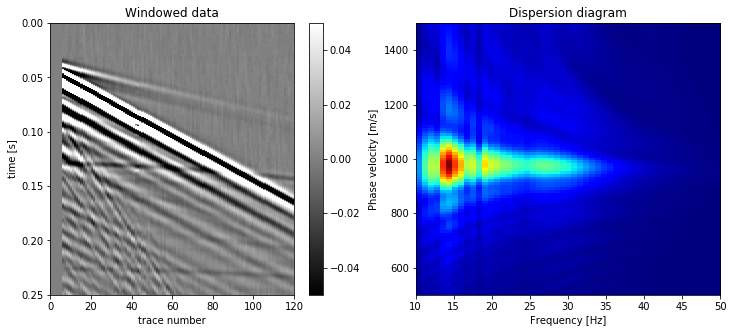

In [8]:
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
dobsw.image(clip=0.05, label2='trace number', label1='time [s]', title='Windowed data', legend=1)
plt.subplot(122)
plt.xlabel(r'Frequency [Hz]') 
plt.ylabel(r'Phase velocity [m/s]')
plt.title(r'Dispersion diagram')
plt.imshow(disp, aspect='auto', extent=[10., 50., vel[0], vel[-1]], cmap='jet', origin='bottom-left')
plt.show()

# Normalize the dispersion diagram

The resulting dispersion diagram is store in a numpy array and can be easily modified.

In [5]:
# Normalize per frequency
dispn = np.zeros(np.shape(disp), dtype=np.float32)
for iw in range(0, len(disp[0])):
    dispn[:, iw] = disp[:, iw]/np.amax(np.abs(disp[:, iw]))

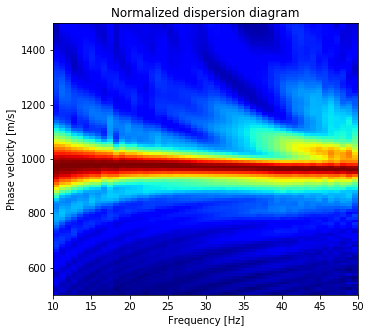

In [10]:
fig1 = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.xlabel(r'Frequency [Hz]') 
plt.ylabel(r'Phase velocity [m/s]')
plt.title(r'Normalized dispersion diagram')
plt.imshow(dispn, aspect='auto', extent=[10., 50., vel[0], vel[-1]], cmap='jet', origin='bottom-left')
plt.show()